# Machine Learning - Lab 1

Pre-written code:

In [1]:
import _pickle as cp
import numpy as np

In [2]:
X, y = cp.load(open('winequality-white.pickle','rb'))

In [3]:
N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train

X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

My code:

In [4]:
import matplotlib.pyplot as plt
import math

### Histogram - Handin 1

(array([  14.,  129., 1164., 1772.,  692.,  144.,    3.]),
 array([ 3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 7 artists>)

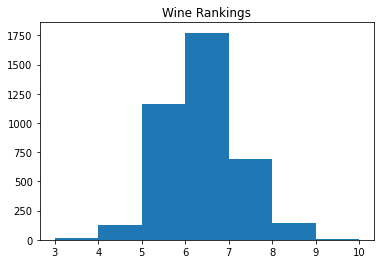

In [5]:
plt.title('Wine Rankings')
plt.hist(
    y_train,
    bins=range(3,11)
)

### Mean-Squared Error - Handin 2

In [6]:
def mse_simple(data):
    '''Calculate the mean-squared error of the data,
       using the training data's average value as the
       prediction for all data points'''
    
    y_avg = np.average(y_train)
    sum = 0
    for pt in data:
        sum += pow((pt - y_avg), 2)
    return sum * 1.0 / len(data)

print(f'Training MSE: {mse_simple(y_train)}')
print(f'Testing MSE:  {mse_simple(y_test)}')

Training MSE: 0.7767772386501273
Testing MSE:  0.8138573000045545


## Linear Regression

In [7]:
def standardize(data, basedOn):
    '''Standardize the data to mean 0, variance 1,
       using the mean and var of the training data'''
    
    mean = np.average(basedOn)
    SD = math.sqrt(np.var(basedOn))
    if SD == 0:
        return [d-mean for d in data]
    return [(d-mean)/SD for d in data]

X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
for i in range(len(X_train[0])):
    train_col = X_train[:,i]
    X_test_stand[:,i] = standardize(X_test[:,i], basedOn=train_col)
    X_train_stand[:,i] = standardize(train_col, basedOn=train_col)

def add_ones_col(X):
    return np.c_[np.ones((len(X),1)),X]

X_train = add_ones_col(X_train)
X_train_stand = add_ones_col(X_train_stand)
X_test = add_ones_col(X_test)
X_test_stand = add_ones_col(X_test_stand)

y_test_stand = standardize(y_test, basedOn=y_train)
y_train_stand = standardize(y_train, basedOn=y_train)

In [8]:
def lin_reg_weights(X,y):
    '''Calculate weights using linear regression on X, y'''

    inv = np.linalg.inv(np.matmul(np.transpose(X), X))  # Calc X^T * X -> matrix
    rt = np.dot(np.transpose(X), y)  # Calc X^T * y -> vector
    return np.dot(inv, rt)  # Calc weight vector

w = lin_reg_weights(X_train_stand, y_train_stand)

def lin_model_on(X_data):
    return np.dot(X_data, w)

### Linear Model MSE - Handin 3

In [9]:
def mse(X_data, y_data, predictor):
    '''Calculate the mean-squared error of the data'''
    
    sum = 0
    for i in range(len(y_data)):
        sum += pow((predictor(X_data[i]) - y_data[i]), 2)
    return sum / len(y_data)

# Can express mse_simple as: mse(X_train, y_train, lambda x: np.average(y_train))

print('Linear Regression\n')

print(f'Training MSE: {mse(X_train_stand, y_train_stand, lin_model_on)}')
print(f'Testing MSE:  {mse(X_test_stand, y_test_stand, lin_model_on)}')

Linear Regression

Training MSE: 0.7260763953051877
Testing MSE:  0.7218661623025742


### Learning Curves - Handin 4

In [10]:
training_errors = []
testing_errors  = []
train_sizes = range(20, 601, 20)

for i in train_sizes:
    X_partial = X_train_stand[:i]
    y_partial = y_train_stand[:i]
    
    # Train the lin reg model on the partial testing data
    w = lin_reg_weights(X_partial,y_partial)
    
    # Calculate training & testing errors
    training_errors.append(mse(X_partial, y_partial, lin_model_on))
    testing_errors.append(mse(X_test_stand, y_test_stand, lin_model_on))

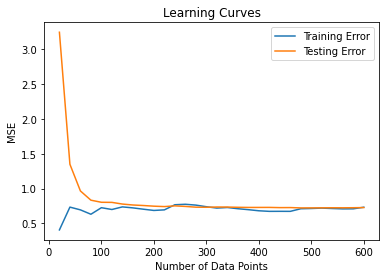

In [11]:
plt.title('Learning Curves')
plt.xlabel('Number of Data Points')
plt.ylabel('MSE')
plt.plot(
    train_sizes,
    training_errors,
    label='Training Error'
)
plt.plot(
    train_sizes,
    testing_errors,
    label='Testing Error'
)
plt.legend()

The model does not seem to be underfitting, as the testing error is roughly equivalent to the training error when using data sets of size 250 and above. It seems like the error curves start to plateau around dataset sizes of 250, although having more data than that would not increase the error of the model.

## Optional

In [12]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

import _pickle as cp
import numpy as np
import matplotlib.pyplot as plt
import math

In [13]:
X, y = cp.load(open('winequality-white.pickle','rb'))

N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train

X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

N_train, D_train = X_train.shape
N_train1 = int(0.8 * N_train)

X_train1 = X_train[:N_train1]
y_train1 = y_train[:N_train1]
X_train2 = X_train[N_train1:]
y_train2 = y_train[N_train1:]

Pipeline tutorial: https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf

In [34]:
def error(y_pred, y_data):
    '''Calculate the mean-squared error of the data'''
    
    sum = 0
    for i in range(len(y_data)):
        sum += pow((y_pred[i] - y_data[i]), 2)
    return sum / len(y_data)

ridge_errors = []
lasso_errors = []

for i in range(-2, 3):
    
    a = pow(10, i)
    ridge = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), Ridge(alpha=a))
    ridge.fit(X_train1, y_train1)
    ridge_y_train2 = ridge.predict(X_train2)
    ridge_errors.append((error(ridge_y_train2, y_train2), i))

    lasso = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), Lasso(alpha=a))
    lasso.fit(X_train1, y_train1)
    lasso_y_train2 = lasso.predict(X_train2)
    lasso_errors.append((error(lasso_y_train2, y_train2), i))

ridge_a = min(ridge_errors)[1]
lasso_a = min(lasso_errors)[1]

print("Optimal Ridge alpha: "+str(ridge_a))
print("Optimal Lasso alpha: "+str(lasso_a))

Optimal Ridge alpha: -2
Optimal Lasso alpha: -2


In [35]:
ridge = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), Ridge(alpha=pow(10, ridge_a)))
lasso = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), Lasso(alpha=pow(10, lasso_a)))
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge_y_train = ridge.predict(X_train)
lasso_y_train = lasso.predict(X_train)
print("Training:")
print("Ridge error: "+str(error(ridge_y_train, y_train)))
print("Lasso error: "+str(error(lasso_y_train, y_train)))

ridge_y_train = ridge.predict(X_test)
lasso_y_train = lasso.predict(X_test)
print("\nTesting:")
print("Ridge error: "+str(error(ridge_y_train, y_test)))
print("Lasso error: "+str(error(lasso_y_train, y_test)))

Training:
Ridge error: 0.501435447142874
Lasso error: 0.548943334650136

Testing:
Ridge error: 0.5161138844984339
Lasso error: 0.5422314371430663
